In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [3]:
df = df[['Age', 'Income']]

In [4]:
df.isna().any()

Age       False
Income    False
dtype: bool

In [5]:
df.describe()

,Age,Income
count,10000.000000,10000.000000
mean,53.511700,40490.495160
std,20.638538,28521.153293
min,18.000000,154.080000
25%,36.000000,19598.775000
50%,53.000000,33768.420000
75%,71.000000,54296.402500
max,89.000000,207249.100000


In [ ]:
list = df.values.tolist()
print(list)

In [7]:
# Compute cluster centers
centroids, _ = kmeans(list, 3)

In [8]:
# Assign cluster labels
df['cluster_labels'], distortion = vq(df, centroids)

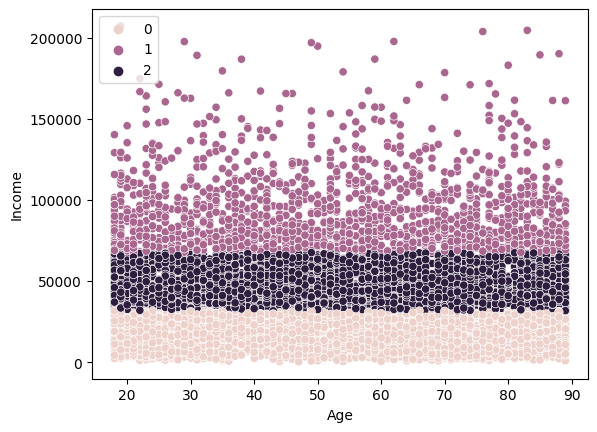

In [9]:
# Plot the points with seaborn
sns.scatterplot(x = 'Age', y = 'Income', hue = 'cluster_labels', data = df)
plt.legend()
plt.show()

In [10]:
scaled_data = whiten(list)
print(scaled_data)

[[2.56813975 3.03565071]
 [2.47122881 1.64117944]
 [2.56813975 0.50386667]
 ...
 [2.18049601 2.31130577]
 [2.08358508 1.04146578]
 [3.39188268 2.1978692 ]]


In [13]:
scaled_int = np.rint(scaled_data)
print(scaled_int)

[[3. 3.]
 [2. 2.]
 [3. 1.]
 ...
 [2. 2.]
 [2. 1.]
 [3. 2.]]


In [12]:
#Generate cluster centers and labels
cluster_centers, _ = kmeans(scaled_data, 2)
scaled_data['cluster_labels'], _ = vq(scaled_data, cluster_centers)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.plot(scaled_data, label = 'scaled')
plt.legend()
plt.show()

In [ ]:
#Plot clusters
sns.scatterplot(x = 'scaled_x', y = 'scaled_y', hue = 'cluster_labels', data = df)
plt.show()

In [ ]:
#Elbow method: Declaring variables for use
distortions = []
num_cluster = range(2, 7)

In [ ]:
#Populating distortions for various clusters
for i in num_cluster:
    centoids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
    distortions.append(distortion)


In [ ]:
#Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_cluster, 'distortions': distortions})
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot_data)
plt.show()